# PART 1 -- Data Processing

In [25]:
import os

# Open a file
path ='../movie_rating_prediction'
dirs = os.listdir( path )

# # This would print all the files and directories
# for file in dirs:
#     print(file)

In [26]:
import pandas as pd
metadata = pd.read_csv('movie_metadata.csv')

In [27]:
from IPython.display import display # allows the use of display() for dataframes
# display a description of the dataset
display(metadata.describe())

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [28]:
print("movie meta dataset has {} samples with {} features each.".format(*metadata.shape))

movie meta dataset has 5043 samples with 28 features each.


In [29]:
metadata['imdb_score'].max() # 9.5

9.5

In [30]:
metadata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Handling Missing Data

Since some features have very high percentage of missing data, it is better to take out these extreme features to reduce complexity. For features have moderate missing values, filling with mean value is a common practice. 

Therefore, two steps are applied to handle the missing data.
    - Step 1: take out any features have more than 40% missing;
    - Step 2: fill missing value with mean from the available values.

In [31]:
total = metadata.isnull().sum()
percentage = round(total / len(metadata) * 100,0)
miss_table = pd.concat([total,percentage], axis=1, keys=['total','percentage'])
# find how many non zero on total column in miss_table
df_miss = miss_table.astype(bool).sum(axis=0)
# df.name = 'metadata'
print("There are {} missing features".format(df_miss['total']))
miss_table.sort_values(by=['total'],ascending=False)

There are 21 missing features


,total,percentage
gross,884,18.0
budget,492,10.0
aspect_ratio,329,7.0
content_rating,303,6.0
plot_keywords,153,3.0
title_year,108,2.0
director_name,104,2.0
director_facebook_likes,104,2.0
num_critic_for_reviews,50,1.0
actor_3_name,23,0.0


Since all the missing value features is less than 40%, we will just need to fill the NaN with mean. 

In [32]:
# get an index list
list_all = list(metadata.columns)

In [33]:
# split the list into numerical and categorical for data process
# list_num = [x for x in list_all if metadata[x].dtypes != 'O' and x not in ['imdb_score']]
list_num = [x for x in list_all if metadata[x].dtypes != 'O']
print(len(list_num)) # 15 numerical features 

list_cat = [x for x in list_all if metadata[x].dtypes == 'O' and x not in ['color','movie_imdb_link']]
# print(list_cat)
print(len(list_cat)) # 12 categorical features 

16
10


In [34]:
# new list contain num and cat, no 'imdb_score'
list_new = list_num + list_cat
list_num

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [35]:
list_cat

['director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'language',
 'country',
 'content_rating']

In [36]:
# now we have all features dataset data_all
data_all = metadata.drop(4)

In [37]:
import numpy as np

In [38]:
data_all.replace({'Color':np.nan},inplace = True)

In [39]:
# fill with mean
for i in list_num:
    data_all[i].fillna(metadata[i].mean(),inplace=True) 


In [40]:
for i in list_cat:
    data_all[i].fillna(metadata[i].mode(),inplace=True) 

In [41]:
data_all = data_all[list_new]

In [42]:
data_all.head(5)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,English,USA,PG-13
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13


In [43]:
# data_all['aspect_ratio']

In [44]:
data_all.to_csv('pre-proessed.csv',index = False)

In [45]:
# read pre-processed data
movie_df = pd.read_csv('pre-proessed.csv')

### Correlation of the features

In [46]:
import seaborn
import matplotlib.pyplot as plt

In [47]:
# plot correlation on the 16 numerical features
#  ['num_critic_for_reviews',
#  'duration',
#  'director_facebook_likes',
#  'actor_3_facebook_likes',
#  'actor_1_facebook_likes',
#  'gross',
#  'num_voted_users',
#  'cast_total_facebook_likes',
#  'facenumber_in_poster',
#  'num_user_for_reviews',
#  'budget',
#  'title_year',
#  'actor_2_facebook_likes',
#  'imdb_score',
#  'aspect_ratio',
#  'movie_facebook_likes']
data_num = movie_df[list_num]

If the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


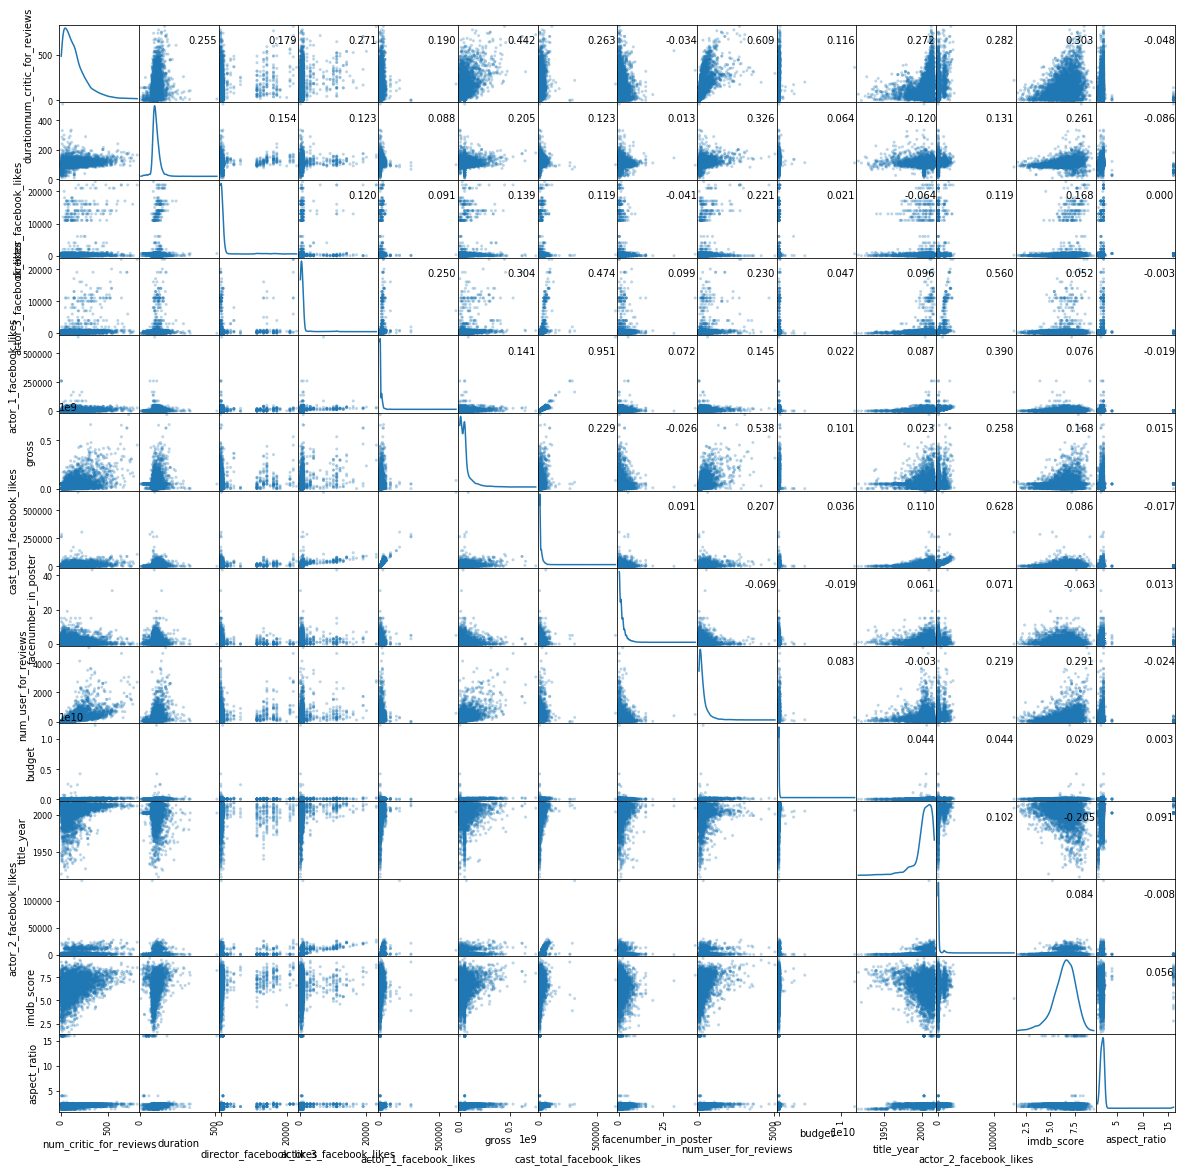

In [49]:
data= data_num.drop(["num_voted_users","movie_facebook_likes"],axis=1)
axes=pd.scatter_matrix(data,alpha=0.3,figsize=(20,20),diagonal='kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

The data is not normally distributed. 

From the distribution of the dataset, cast_total_facebook_likes is highly correlated with actor_1_facebook_likes. cast_total_facebook_likes shows strong liner correlation with actor_2_facebook_likes. Therefore, we can just use actor_2_facebook_likes instead use both to predict imdb score. 

Correlation with imdb_score:

1. facenumber_in_poster shows a small negative corrlation with imdb_score, which indicates more faces in the poster might hurt the score. 
2. num_critic_for_reviews,num_user_for_review, and duraction have some(around 0.2~0.3) positive correlation with score. This indicates that the longer the moview, and more critic from reviews, the movie will have a higher chance of high imdb score. 
3. The correlations with actor_facebook_likes for all actor1, 2, 3 are very small positive,  meaning that an actor is popular in social network does not mean that a movie is high rating if he is the leading actor. So do supporting actors.

In [50]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
num_critic_for_reviews,1.000000,0.255242,0.178908,0.270935,0.189731,0.441966,0.262906,-0.033634,0.608509,0.115756,0.272200,0.281762,0.302819,-0.047702
duration,0.255242,1.000000,0.153709,0.123012,0.088379,0.204975,0.123037,0.013362,0.326152,0.064412,-0.119520,0.131232,0.260895,-0.085871
director_facebook_likes,0.178908,0.153709,1.000000,0.120121,0.090540,0.139230,0.119290,-0.040851,0.221168,0.020907,-0.063819,0.119469,0.167596,0.000057
actor_3_facebook_likes,0.270935,0.123012,0.120121,1.000000,0.249859,0.304314,0.473642,0.099282,0.229994,0.047095,0.095710,0.559579,0.052489,-0.003345
actor_1_facebook_likes,0.189731,0.088379,0.090540,0.249859,1.000000,0.140584,0.951471,0.072173,0.145375,0.022325,0.086680,0.390422,0.076098,-0.018665
gross,0.441966,0.204975,0.139230,0.304314,0.140584,1.000000,0.229046,-0.025512,0.538448,0.101437,0.022622,0.258103,0.168175,0.014829
cast_total_facebook_likes,0.262906,0.123037,0.119290,0.473642,0.951471,0.229046,1.000000,0.091391,0.206833,0.036029,0.109740,0.628158,0.085854,-0.016933
facenumber_in_poster,-0.033634,0.013362,-0.040851,0.099282,0.072173,-0.025512,0.091391,1.000000,-0.068839,-0.018713,0.060772,0.071133,-0.062769,0.013051
num_user_for_reviews,0.608509,0.326152,0.221168,0.229994,0.145375,0.538448,0.206833,-0.068839,1.000000,0.082879,-0.003157,0.219350,0.291482,-0.024328
budget,0.115756,0.064412,0.020907,0.047095,0.022325,0.101437,0.036029,-0.018713,0.082879,1.000000,0.043862,0.043779,0.028906,0.003093


When use these features to predict movie imdb score,some features such as "num_voted_users" and "movie_facebook_likes" are not applicable for prediction, because these numbers will be unavailable before a movie is released.

In [51]:
data_reduced= data.drop(["cast_total_facebook_likes"],axis=1)

In [58]:
data_reduced.to_csv('dimension_reduce.csv',index=False)
# this will be used in tensorflow-predict

### Visualization

/Users/wkw/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


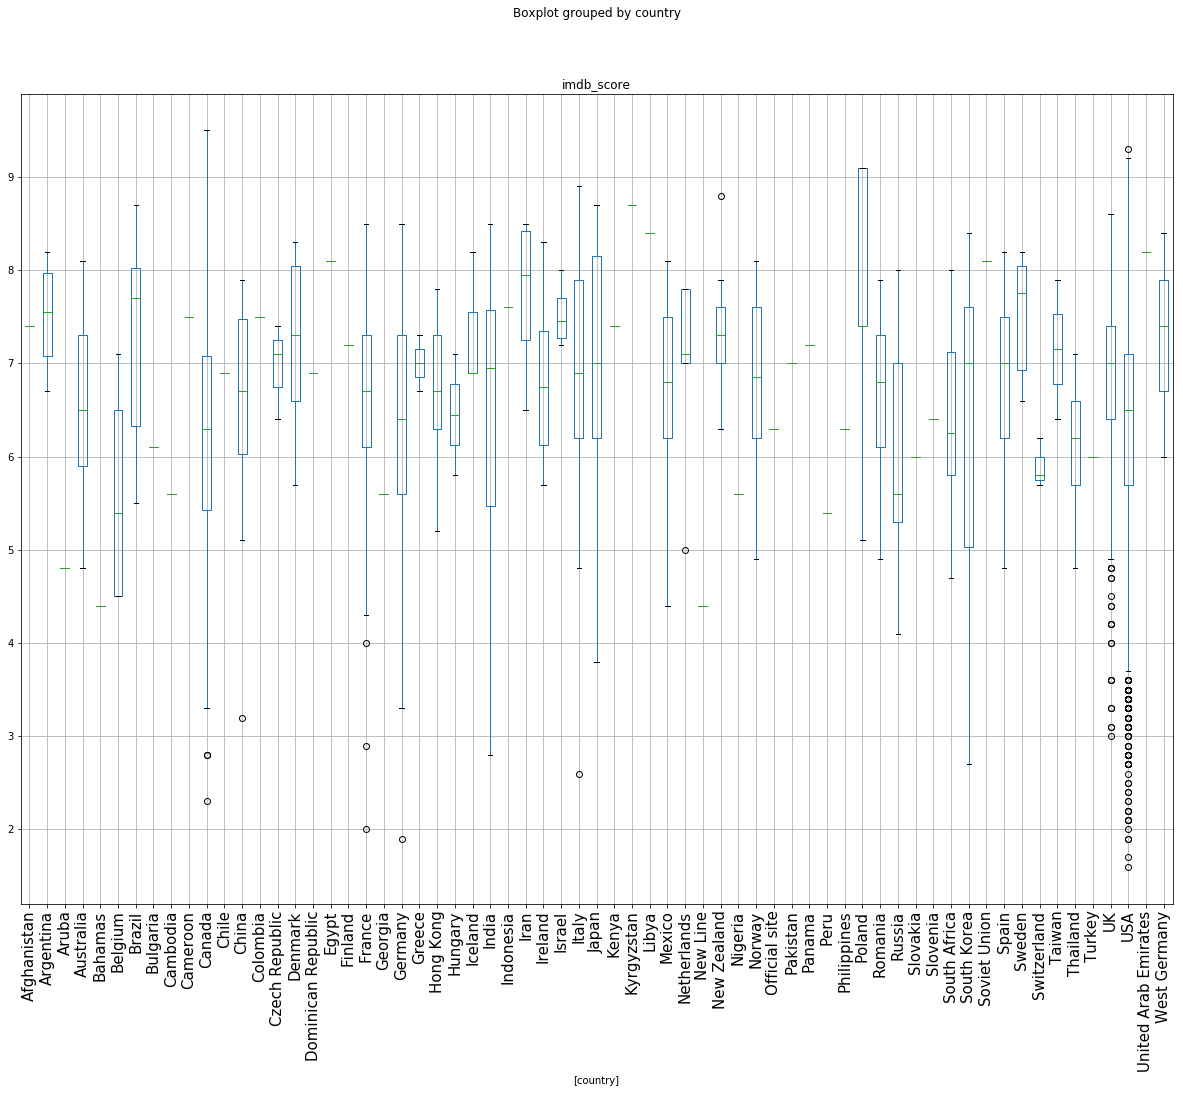

In [54]:
#imdb score vs country
df = data_all[['country','imdb_score']]
df.boxplot(by='country', figsize = [20,15])
plt.xticks(rotation = 90, fontsize=15)
plt.show()

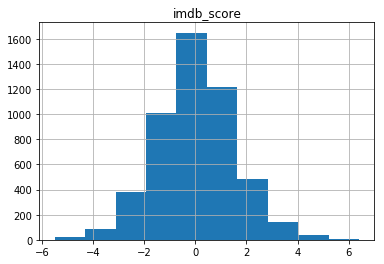

In [55]:
data_all['imdb_score'].diff().hist()
plt.title("imdb_score")
plt.show()

/Users/wkw/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


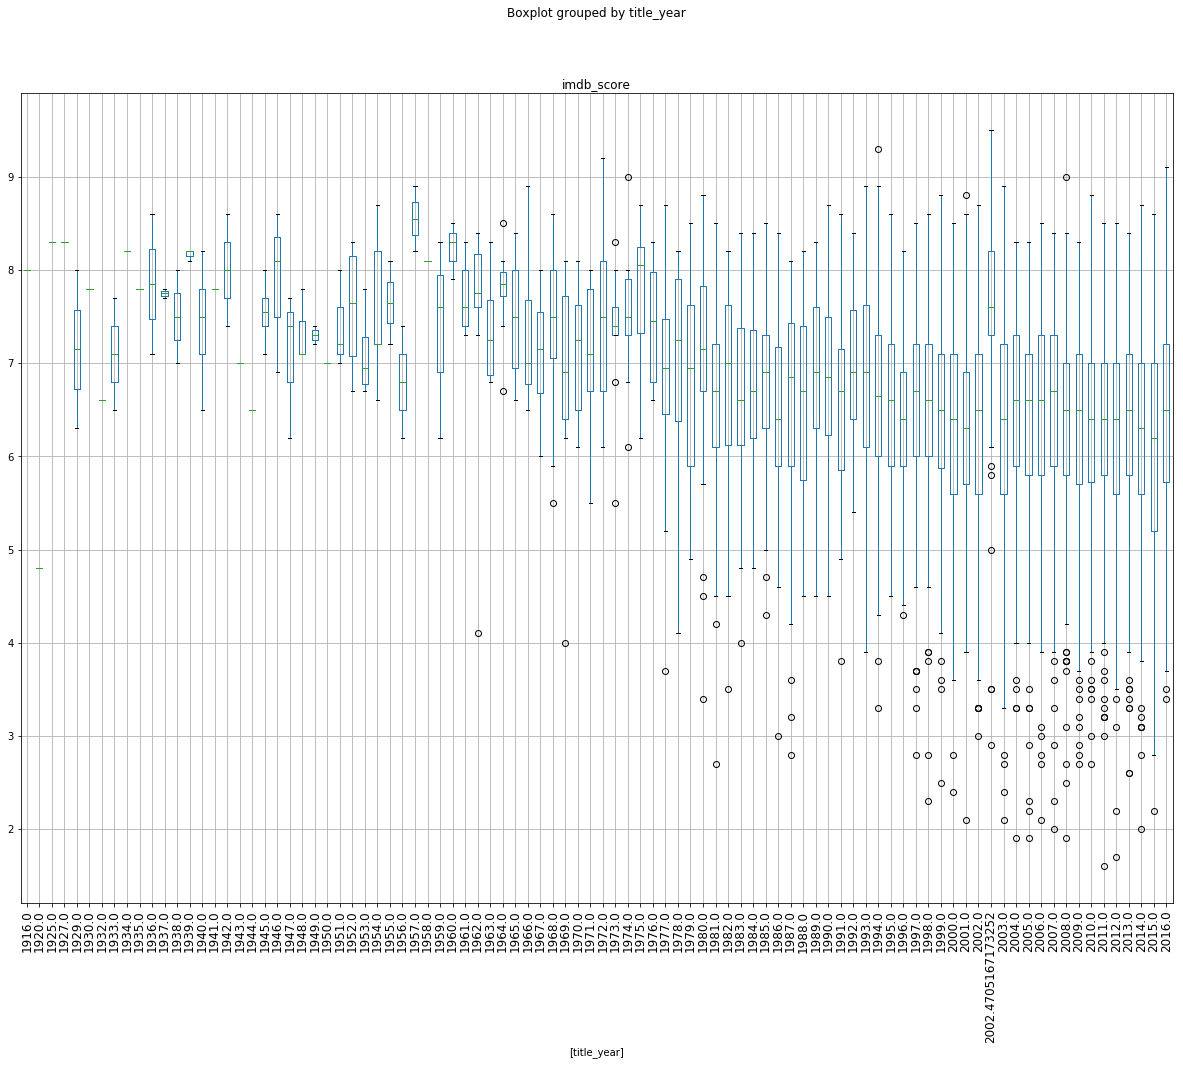

In [56]:
df = data_all[['title_year','imdb_score']]
df.boxplot(by='title_year', figsize = [20,15])
plt.xticks(rotation = 90, fontsize=12)
plt.show()

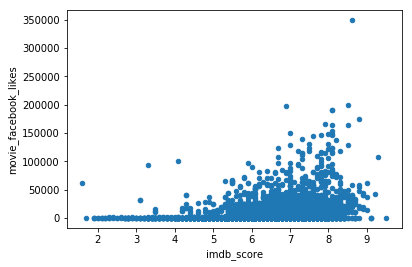

In [57]:
data_all.plot.scatter('imdb_score','movie_facebook_likes')
plt.show()
# the higher the facebok likes, the positive correlation of higher score

# PART 2 -- Tensorflow 

Please refer to Tensorflow_predict.ipynb under the same directory. 